# Construindo uma Rede Neural - MNIST

http://yann.lecun.com/exdb/mnist/

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from time import time

In [0]:
np.__version__

'1.18.4'

In [0]:
pd.__version__

'1.0.3'

In [0]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf
import keras
keras.__version__

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
np.random.seed(1337)

In [0]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [0]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df.shape

(28683, 785)

In [0]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28679,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28680,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_trai

In [0]:
from matplotlib import pyplot

In [0]:
# from PIL import Image 
# import numpy as np 
# im = Image.open(filename) 
# im = im.resize(size,Image.LANCZOS) 
# #if your images are not already the size you want 
# im = np.asarray(im)/255

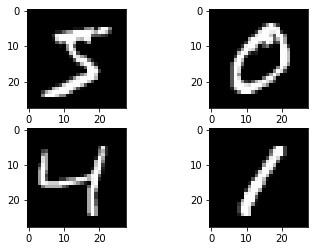

In [0]:
# Plot ad hoc mnist instances 
import matplotlib.pyplot as plt 
# load (downloaded if needed) the MNIST dataset 
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' )) 
# show the plot plt.show()


## Criando um Modelo de Árvore de Decisão ( Benchmark)

In [0]:
X_train_c = X_train.reshape(60000, 784).copy()
X_test_c = X_test.reshape(10000, 784).copy()

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0, verbose=3)
model = model.fit(X_train_c, y_train)

y_prediction = model.predict(X_test)
print ("\nAcurácia", np.sum(y_prediction == df_test['label'].values) / float(len(y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.2s finished


ValueError: ignored

## RNA com 1 Camada

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# from time import time

# start = time()

model = Sequential()

model.add(Dense(input_dim=784, units=10))

model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_c, y_train, epochs=10)

print ('\nTempo gasto: %s segundos' % str(time() - start))

Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 9.9231 - accuracy: 0.8400
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 6.1186 - accuracy: 0.8775
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.6734 - accuracy: 0.8819
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 5.4892 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.2599 - accuracy: 0.8870
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.2913 - accuracy: 0.8883
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.2724 - accuracy: 0.8884
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.3157 - accuracy: 0.8894
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 5.1708 - accuracy: 0.8907
Epoch 10/10
60000/60000 [==============================

In [0]:
import numpy as np
y_prediction = model.predict_classes(X_test_c)
print ("\n\nAcurácia", np.sum(y_prediction == y_test) / float(len(y_test)))



Acurácia 0.8969


## RNA com 2 Camadas

In [0]:
start = time()

model = Sequential()

model.add(Dense(input_dim=784, units=100))

model.add(Dense(units=10))

model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_c, y_train, epochs=10)

print ('\nTempo gasto: %s segundos' % str(time() - start))

Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 14.2028 - accuracy: 0.8553
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 3.4992 - accuracy: 0.8769
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 1.1047 - accuracy: 0.8678
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.9541 - accuracy: 0.8566
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.9821 - accuracy: 0.8536
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.9994 - accuracy: 0.8587
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.9636 - accuracy: 0.8648
Epoch 8/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.9605 - accuracy: 0.8658
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.9952 - accuracy: 0.8677
Epoch 10/10
60000/60000 [=============================

In [0]:
y_prediction = model.predict_classes(X_test_c)
print ("\n\nAcurácia", np.sum(y_prediction == y_test) / float(len(y_test)))



Acurácia 0.8853


## RNA com 3 Camadas

In [0]:
start = time()

model = Sequential()

model.add(Dense(input_dim=784, units=100))

model.add(Dense(units=100))

model.add(Dense(units=10))

model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_c, y_train, epochs=10)

print ('\nTempo gasto: %s segundos' % str(time() - start))

Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 8.0870 - accuracy: 0.8316
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.9956 - accuracy: 0.8383
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.1136 - accuracy: 0.8451
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.3933 - accuracy: 0.8527
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.9163 - accuracy: 0.8620
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.7034 - accuracy: 0.8663
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.6133 - accuracy: 0.8665
Epoch 8/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.5180 - accuracy: 0.8737
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.4613 - accuracy: 0.8820
Epoch 10/10
60000/60000 [==============================

In [0]:
y_prediction = model.predict_classes(X_test)
print ("\n\nAcurácia", np.sum(y_prediction == y_test) / float(len(y_test)))



Acurácia 0.9202380952380952


RNA COM 4 CAMADAS

In [0]:
pip install keras

     |████████████████████████████████| 378kB 2.8MB/s 


In [0]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D,  MaxPooling2D

In [0]:
from keras.layers import Flatten

In [0]:
from keras import utils

In [0]:
y_trains_oh = utils.to_categorical(y_train)

In [0]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))

model.add(Dense(units=1000))

model.add(Dense(units=100))

model.add(Dense(units=10))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dense_23 (Dense)             (None, 26, 26, 1000)      33000     
_________________________________________________________________
dense_24 (Dense)             (None, 26, 26, 100)       100100    
_________________________________________________________________
dense_25 (Dense)             (None, 26, 26, 10)        1010      
_________________________________________________________________
dense_26 (Dense)             (None, 26, 26, 10)        110       
Total params: 134,540
Trainable params: 134,540
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_trains_oh, epochs=10)



Epoch 1/10
 8512/60000 [===>..........................] - ETA: 12:05 - loss: 1.5637 - accuracy: 0.8318

KeyboardInterrupt: ignored

# Fim